In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import re


In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

## pca

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
df = pd.read_csv("2single_label_nodrop.csv")

In [43]:
df.drop(['artist_names','artists_id','release_date','song_title (censored)','year','popularity','genre'],axis=1,inplace=True)
df.drop(df.columns[0],axis=1,inplace=True)

In [49]:
df.columns

Index(['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'explicit', 'duration_ms'],
      dtype='object')

In [44]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_td = scaler.transform(df)
df_td=pd.DataFrame(df_td)
df_td.columns=['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'explicit', 'duration_ms']

In [52]:
pca_line = PCA().fit(df_td)

In [54]:
pca_line.explained_variance_ratio_

array([0.22877767, 0.11894697, 0.09393351, 0.08943084, 0.07824025,
       0.07486843, 0.07176198, 0.0639298 , 0.06115855, 0.05207736,
       0.02991706, 0.02768354, 0.00927405])

In [117]:
datax = list(range(13))
datay = np.cumsum(pca_line.explained_variance_ratio_)
dic={'number':datax,"variance":datay}
tmpp = pd.DataFrame(data=dic)
tmpp.to_csv("累计方差.csv")

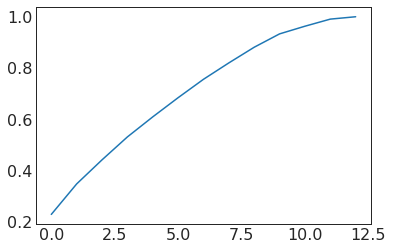

In [57]:
plt.plot(datax,datay)

降维

In [63]:
df_dr = PCA(10).fit_transform(df_td)#在10有拐点

In [68]:
df = pd.read_csv("2single_label_nodrop.csv")

In [103]:
poprock = df_dr[df['genre'] == 'Pop/Rock']
rb = df_dr[df['genre'] == 'R&B;']
country = df_dr[df['genre'] == 'Country']
jazz = df_dr[df['genre'] == 'Jazz']
vocal = df_dr[df['genre'] == 'Vocal']
latin = df_dr[df['genre'] == 'Latin']
classical = df_dr[df['genre'] == 'Classical']
inter = df_dr[df['genre'] == 'International']
reg = df_dr[df['genre'] == 'Reggae']
elec = df_dr[df['genre'] == 'Electronic']
folk = df_dr[df['genre'] == 'Folk']
blue = df_dr[df['genre'] == 'Blues']
ss = df_dr[df['genre'] == 'Stage & Screen']
el = df_dr[df['genre'] == 'Easy Listening']
reli = df_dr[df['genre'] == 'Religious']
newage = df_dr[df['genre'] == 'New Age']
coms = df_dr[df['genre'] == 'Comedy/Spoken']
ag = df_dr[df['genre'] == 'Avant-Garde']
child = df_dr[df['genre'] == "Children's"]


In [105]:
dff = [poprock,rb,country,jazz,vocal,latin,classical,inter,reg,elec,folk,blue,ss,el,reli,newage,coms,ag,child]

In [109]:
for index in dff:

    num = np.random.randint(0,index.shape[0],size=int(index.shape[0]*0.5))
    tmp = index[num,:]
    
    result = cosine_similarity(tmp)#余弦相似函数
    mean = np.mean(result)
    print(mean)

0.18913066549734908
0.05848546829055976
0.17252822619336072
0.41130674438793563
0.394999161697806
0.12692620315692837
0.556793650272295
0.21153883642591517
0.29223911028082916
0.1967235858857595
0.4031451305672257
0.08791422749551071
0.6010490012454994
0.44912962569247733
0.1930892883411291
0.35443427920273834
0.3871852051225775
0.48521023458219636
0.5031764114524784


In [115]:
out=[]
for i in range(len(dff)):
    for j in range(1,len(dff)):
        print(i,j)
        num1 = np.random.randint(0,dff[i].shape[0],size=int(dff[i].shape[0]*0.5))
        num2 = np.random.randint(0,dff[j].shape[0],size=int(dff[j].shape[0]*0.5))
        tmp1 = dff[i][num1,:]
        tmp2 = dff[j][num2,:]
        result = cosine_similarity(tmp1,tmp2)#余弦相似函数
        mean = np.mean(result)
        out.append(mean)
        print(mean)
        
        

0 1
0.007358316058921548
0 2
0.021351270484440615
0 3
-0.0844416762988787
0 4
-0.06314423703792388
0 5
0.015387935831873707
0 6
-0.1134715690049225
0 7
-0.04724267399458453
0 8
-0.0012066392826823018
0 9
-0.009612082021310807
0 10
-0.06182985489318371
0 11
-0.02304989383071982
0 12
-0.06144460803975241
0 13
-0.04034963563782084
0 14
0.04863956093672552
0 15
-0.09342799776420171
0 16
-0.06195613761360645
0 17
-0.04024842738551432
0 18
-0.04829037738201453
1 1
0.09438017083129334
1 2
0.037722369242768734
1 3
-0.0642753153158207
1 4
-0.055006062722383675
1 5
0.04943798204950356
1 6
-0.11125304414889883
1 7
0.02693495903758047
1 8
0.07737284275308062
1 9
0.008210889567651872
1 10
-0.03771056617874006
1 11
0.03849146214765302
1 12
-0.1753591731760308
1 13
-0.11017392094718982
1 14
-0.0021690808849685775
1 15
-0.0772547453191139
1 16
0.019830940455975537
1 17
0.012450818293144792
1 18
0.044166698607962754
2 1
0.021316130466852646
2 2
0.13199048335189464
2 3
-0.0637994174041207
2 4
0.05053773

-0.12345759588845745
18 10
0.17478690595218777
18 11
0.2392501278139935
18 12
0.004821467539130298
18 13
0.0917972305045767
18 14
-0.047920939296828405
18 15
-0.10501097664356453
18 16
0.10204399763744586
18 17
0.22965463709221498
18 18
0.3347845054508945
